In [1]:
import xarray as xr
import numpy as np
import scipy.io as io
import matplotlib.pyplot as plt
import pandas as pd
from netCDF4 import Dataset as netcdf

In [2]:
from affine import Affine
tif = xr.open_rasterio('/home/s1423313/Documents/Svalbard/Regions/Region_Masks/07_rgi60_Svalbard_corr_land_R1.tif')

In [50]:
ncfile = netcdf('/exports/csce/datastore/geos/groups/geos_EO/Databases/MAR/Svalbard-RA/Svalbard_Masked/Years/Svalbard_2001.nc')
ncfile.variables
ds= xr.open_dataset('/exports/csce/datastore/geos/groups/geos_EO/Databases/MAR/Svalbard-RA/Svalbard_Masked/Svalbard_LR1.nc')
ds['time']= pd.date_range('2001-01-01','2019-12-31')
ds

<xarray.Dataset>
Dimensions:   (time: 6939)
Coordinates:
  * time      (time) datetime64[ns] 2001-01-01 2001-01-02 ... 2019-12-31
Data variables:
    smb_mean  (time) float64 ...
    rf_mean   (time) float64 ...

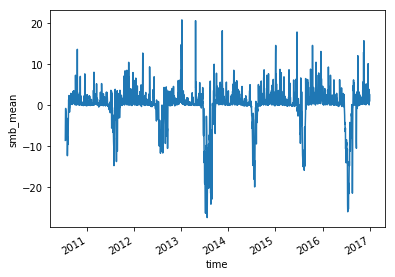

In [59]:
ds.smb_mean.sel(time=slice('2010-07-18','2016-12-31')).plot()

In [12]:
matdata=io.loadmat('/geos/d14/CS2/dhdt/Timeseries/Svalbard_LR1_MF/tmsr_45_90_07_rgi60_Svalbard_corr_land_R1.mat')

In [13]:

    elevation = matdata['Tmsr'][0]
    time = matdata['time'][0]
    timepy= pd.to_datetime(time-719529, unit='D')
    E_ds = xr.Dataset(data_vars = dict(elev= (["time"],elevation)),coords=dict(time=timepy))

In [2]:
def MARplot(matfile,ncfile,title,npng):
    ds= xr.open_dataset(ncfile)
    ds['time']= pd.date_range('2001-01-01','2019-12-31')
    SMB=ds.smb_mean
    RF=ds.rf_mean

    matdata=io.loadmat(matfile)
    elevation = matdata['Tmsr'][0]
    t = matdata['time'][0]
    timepy= pd.to_datetime(t-719529, unit='D')
    E_ds = xr.Dataset(data_vars = dict(elev= (["t"],elevation)),coords=dict(t=timepy))

    labels = ['Elevation Land', 'MAR: SMB','MAR: SF']
    fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(18,10), sharex=True)
    plt.suptitle(title, fontsize=16)

    color = 'tab:red'
    ax1.set_ylabel('elevation[m]', color=color, fontsize=14)
    ax1.plot(E_ds.t, E_ds.elev, color=color)

    color = 'tab:blue'
    ax2.set_ylabel('kg m$^{2}$', color=color, fontsize=14)  # we already handled the x-label with ax1
    ax2.plot(SMB.time.sel(time=slice('2010-07-18','2019-12-31')), SMB.sel(time=slice('2010-07-18','2019-12-31')), color=color)

    color = 'tab:green'
    ax3.set_ylabel('mmWE/day', color=color, fontsize=14)  
    ax3.plot(RF.time.sel(time=slice('2010-07-18','2019-12-31')), RF.sel(time=slice('2010-07-18','2019-12-31')), color=color)

    fig.legend(labels)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # otherwise the right y-label is slightly clipped
    plt.savefig(npng)
    plt.show()
   

/usr/lib64/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


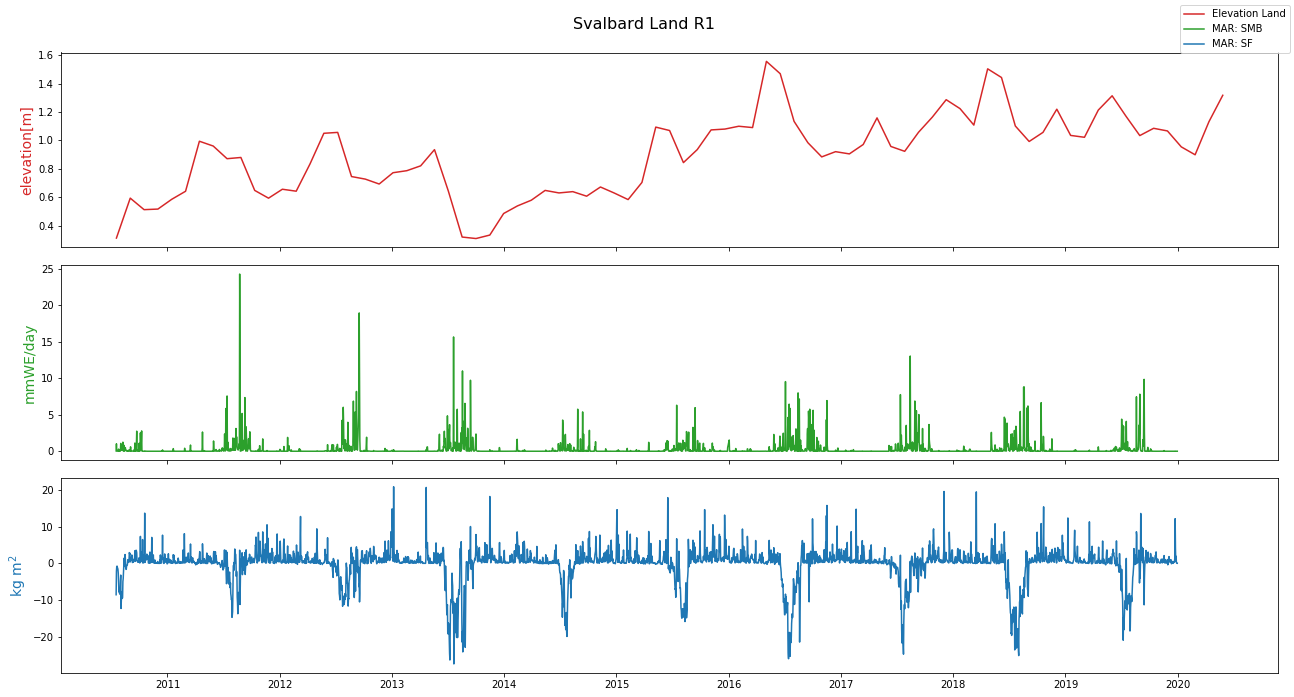

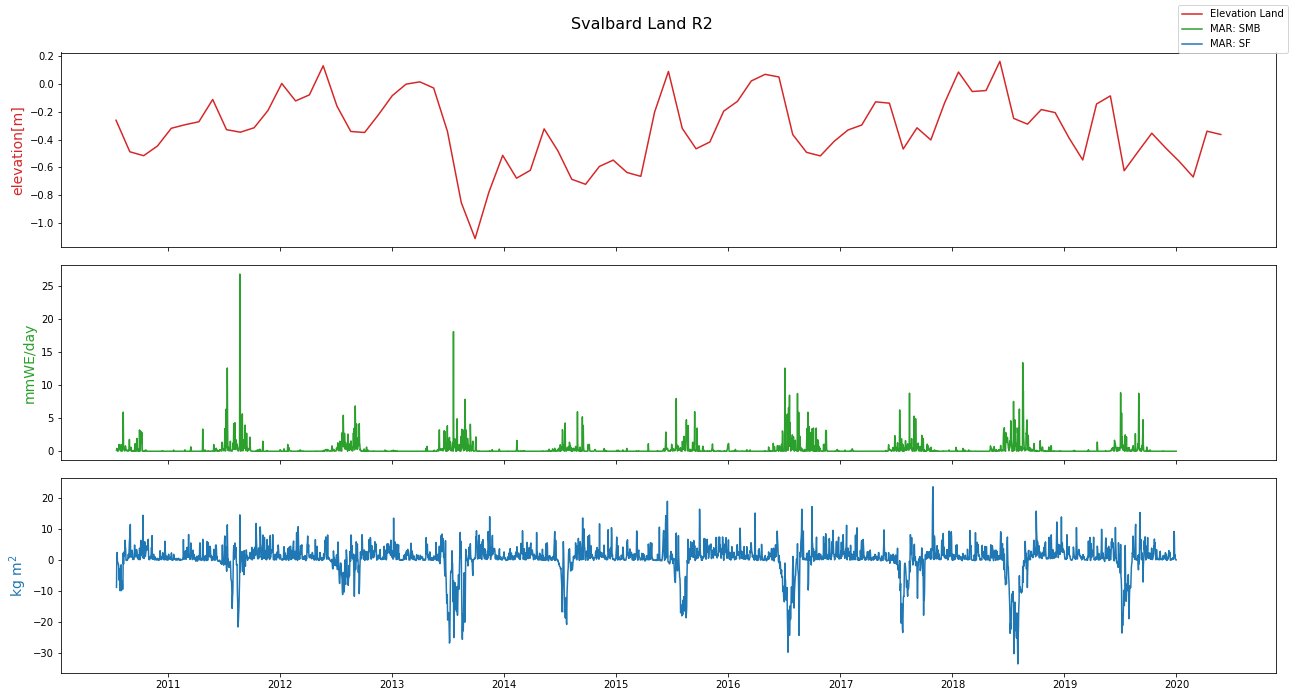

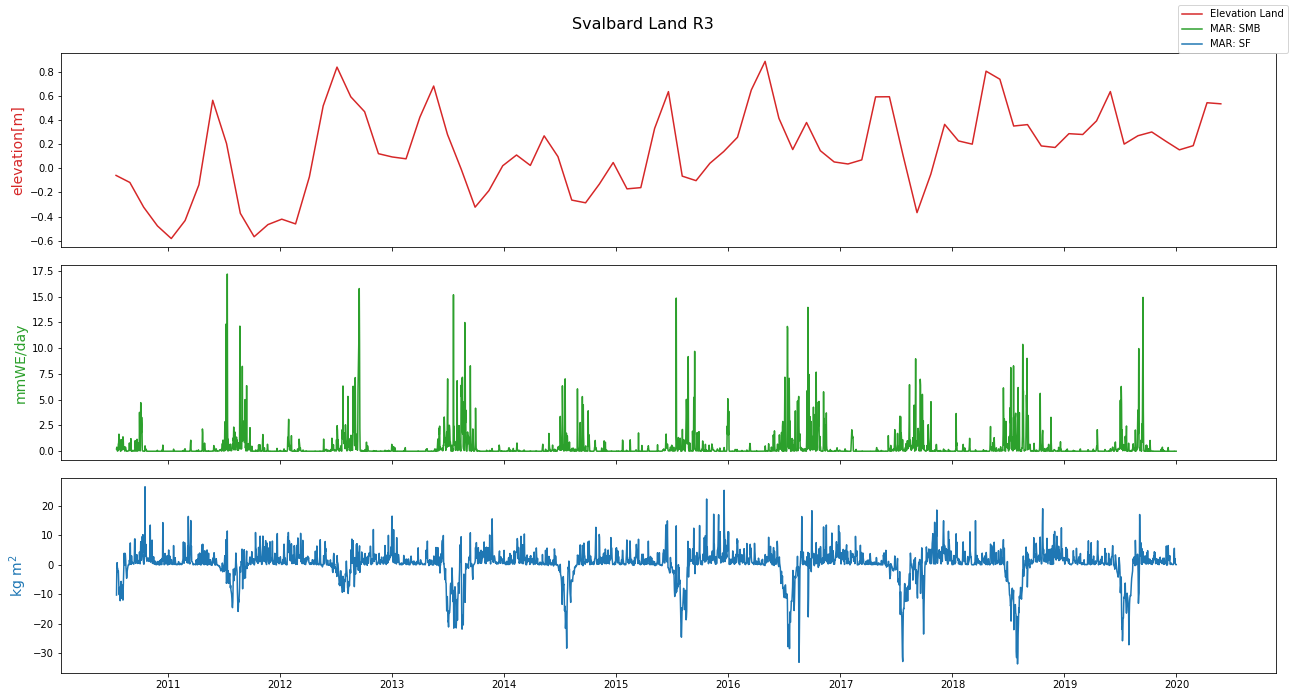

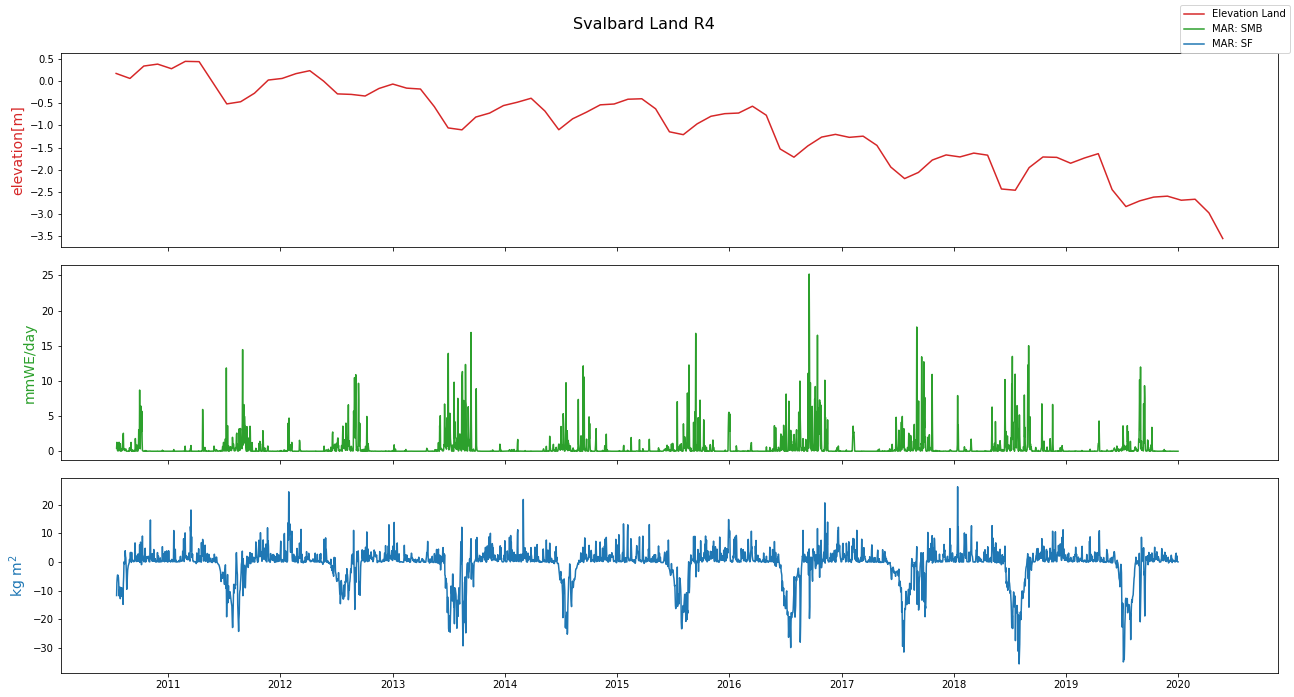

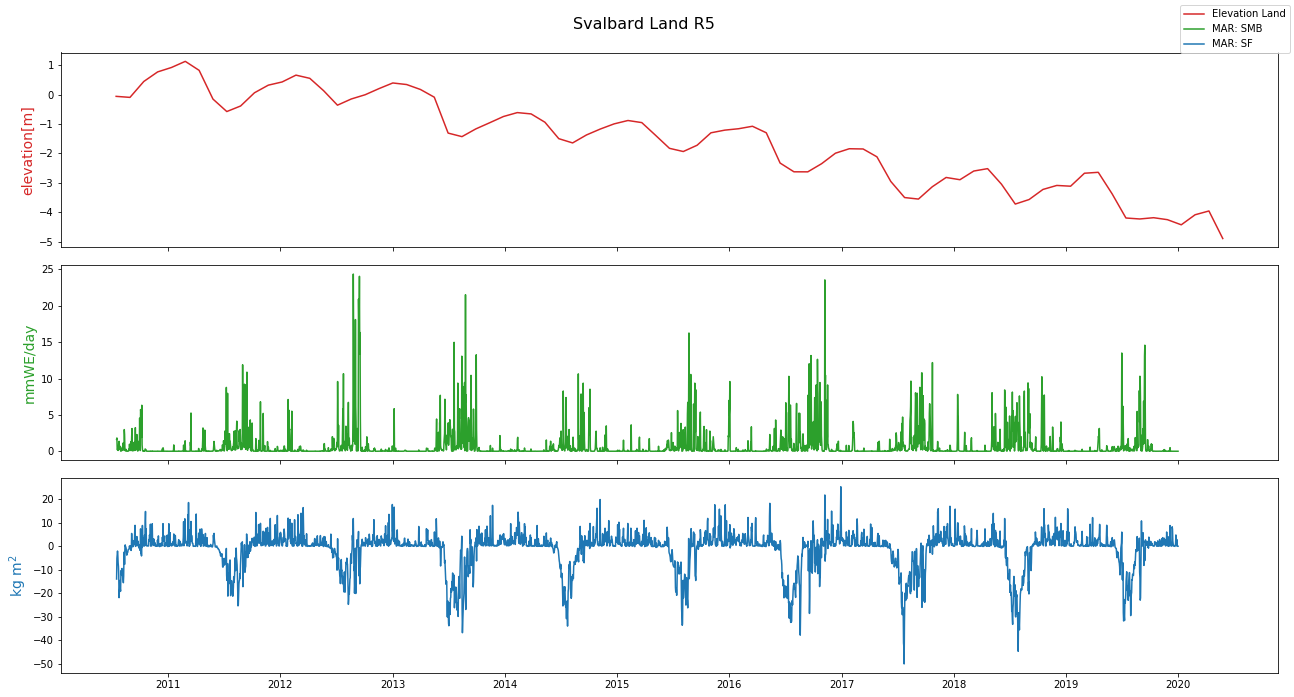

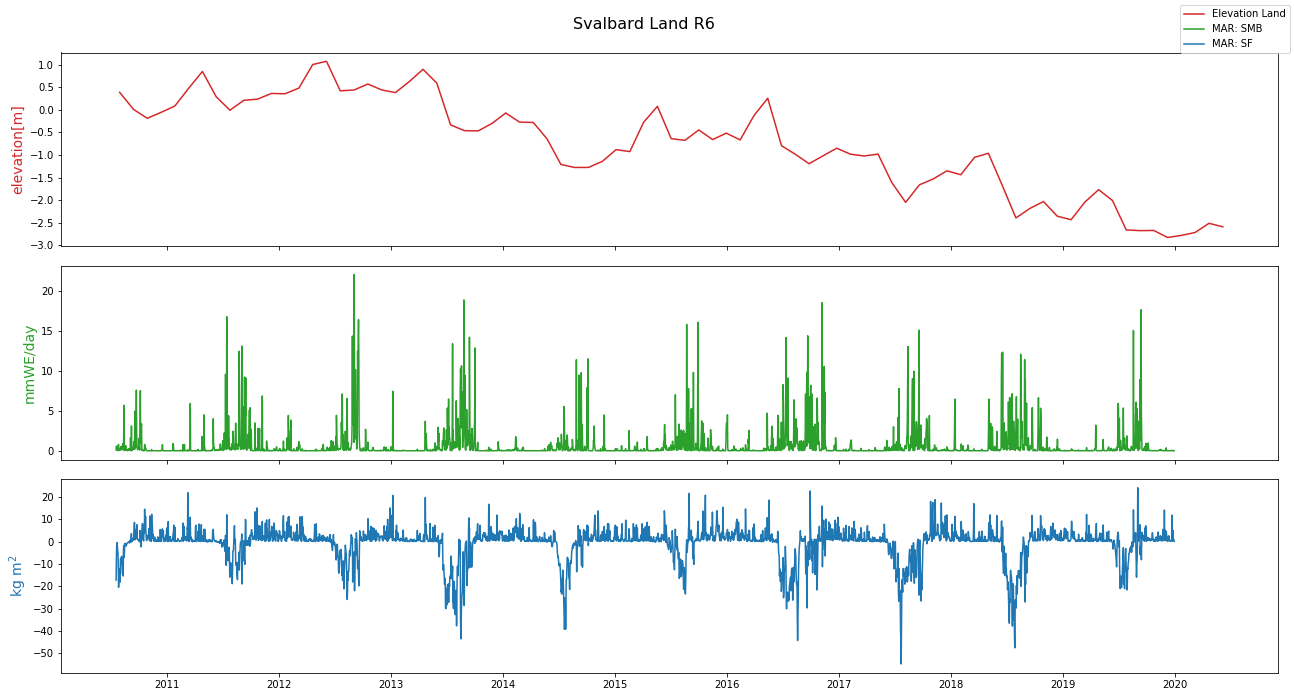

In [3]:
for i in range(1,7):
    MARplot('/geos/d14/CS2/dhdt/Timeseries/Svalbard_LR'+str(i)+'_MF/tmsr_45_90_07_rgi60_Svalbard_corr_land_R'+str(i)+'.mat','/exports/csce/datastore/geos/groups/geos_EO/Databases/MAR/Svalbard-RA/Svalbard_Masked/Svalbard_LR'+str(i)+'.nc','Svalbard Land R'+str(i),'Svalbard_LR'+str(i)+'.png')


In [ ]:

fig, ax1 = plt.subplots(figsize=(18,10))

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('elevation[m]', color=color)
ax1.plot(MAR_data.time, MAR_data.elevation_Aus_land, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('mmWE/day', color=color)  # we already handled the x-label with ax1
ax2.plot(timeseries.TIME.sel(TIME=slice('2010-07-18','2019-12-31')), timeseries.sel(TIME=slice('2010-07-18','2019-12-31')), color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.legend(labels)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.figure(figsize=(18,10))
plt.show()